# **Fetal Health Prediction ⚕️**

## Introduction

The UN's Sustainable Development Goals aim to reduce child and maternal mortality by 2030. The numbers are shocking: 295,000 women died from pregnancy-related complications in 2017, 94% in low-resource settings. Most importantly, medical monitoring and intervention could have prevented most of these deaths.

For non-invasive, cost-effective fetal health monitoring, cardiotocography (CTG) is essential. CTG records fetal heart rate (FHR), movements, and uterine contractions to help healthcare professionals assess fetal well-being and identify life-threatening complications..

## Problem Statement

CTG technology is widely available and affordable, but interpreting CTG readings requires expertise that may not be available in all healthcare settings, especially in resource-limited areas. A critical healthcare delivery gap exists.

This project uses a machine learning model to classify CTG readings as Normal, Suspect, or Pathological. This notebook will use 2,126 CTG recordings classified by three expert obstetricians to create a reliable classification system to help healthcare providers identify high-risk cases requiring immediate attention..

# Dataset Source

[Fetal Health Dataset](https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification/data) is a dataset that publicly available for Classify fetal health in order to prevent child and maternal mortality..



<p style="background-color: #000000; font-family: Georgia, serif; font-size: 24px; text-align: center; color: #FFD700; padding: 10px; border-radius: 20px; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    Fetal Health Classification
</p>

## 1) Importing the libraries

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,matthews_corrcoef
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import plotly.graph_objs as go
import plotly.subplots as sp
plt.style.use('seaborn-v0_8-whitegrid')

### Loading the Dataset

In [29]:
df = pd.read_csv('fetal_health.csv')

In [30]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [31]:
df.shape

(2126, 22)

## 2) Data Preprocessing

In [32]:
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [33]:
df.duplicated().sum()

13

In [34]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [35]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


### Dropping the duplicate rows

In [36]:
df.drop_duplicates(keep='first', inplace=True)
df.duplicated().sum()

0

## 3) Exploratory Data Analysis

### Count of Fetal Health Categories

<h1 style="color:#FFFFFF; text-align:left; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.1);">
  ● Univariate Analysis
</h1>


In [37]:
# Bar plot for fetal_health value counts

bar_fig = go.Bar(
    x=(df['fetal_health']-1).value_counts().index,
    y=(df['fetal_health']-1).value_counts().values,
    marker=dict(color='#66C2A5')
)

# Pie chart for fetal_health value counts
pie_fig = go.Pie(
    labels=(df['fetal_health']-1).value_counts().index,
    values=(df['fetal_health']-1).value_counts().values,
    hole=0.3  # Optional: for a donut-style pie chart
)

# Create subplots with Plotly
fig = sp.make_subplots(
    rows=1, cols=2,
    subplot_titles=("Bar Plot of Fetal Health Condition", "Fetal Health Distribution"),
    specs=[[{"type": "bar"}, {"type": "pie"}]]
)

# Add the bar plot to the first subplot
fig.add_trace(bar_fig, row=1, col=1)

# Add the pie chart to the second subplot
fig.add_trace(pie_fig, row=1, col=2)

# Update layout for better visualization
fig.update_layout(
    title_text="Fetal Health Distribution",
    showlegend=False,  # Hide legend to avoid redundancy in pie chart
    height=500,
    width=700
)

# Show the figure
fig.show()


<h1 style="color:#FFFFFF; text-align:left; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.1);">
  ● Visualizing Data Distributions with <code>histplot</code>
</h1>

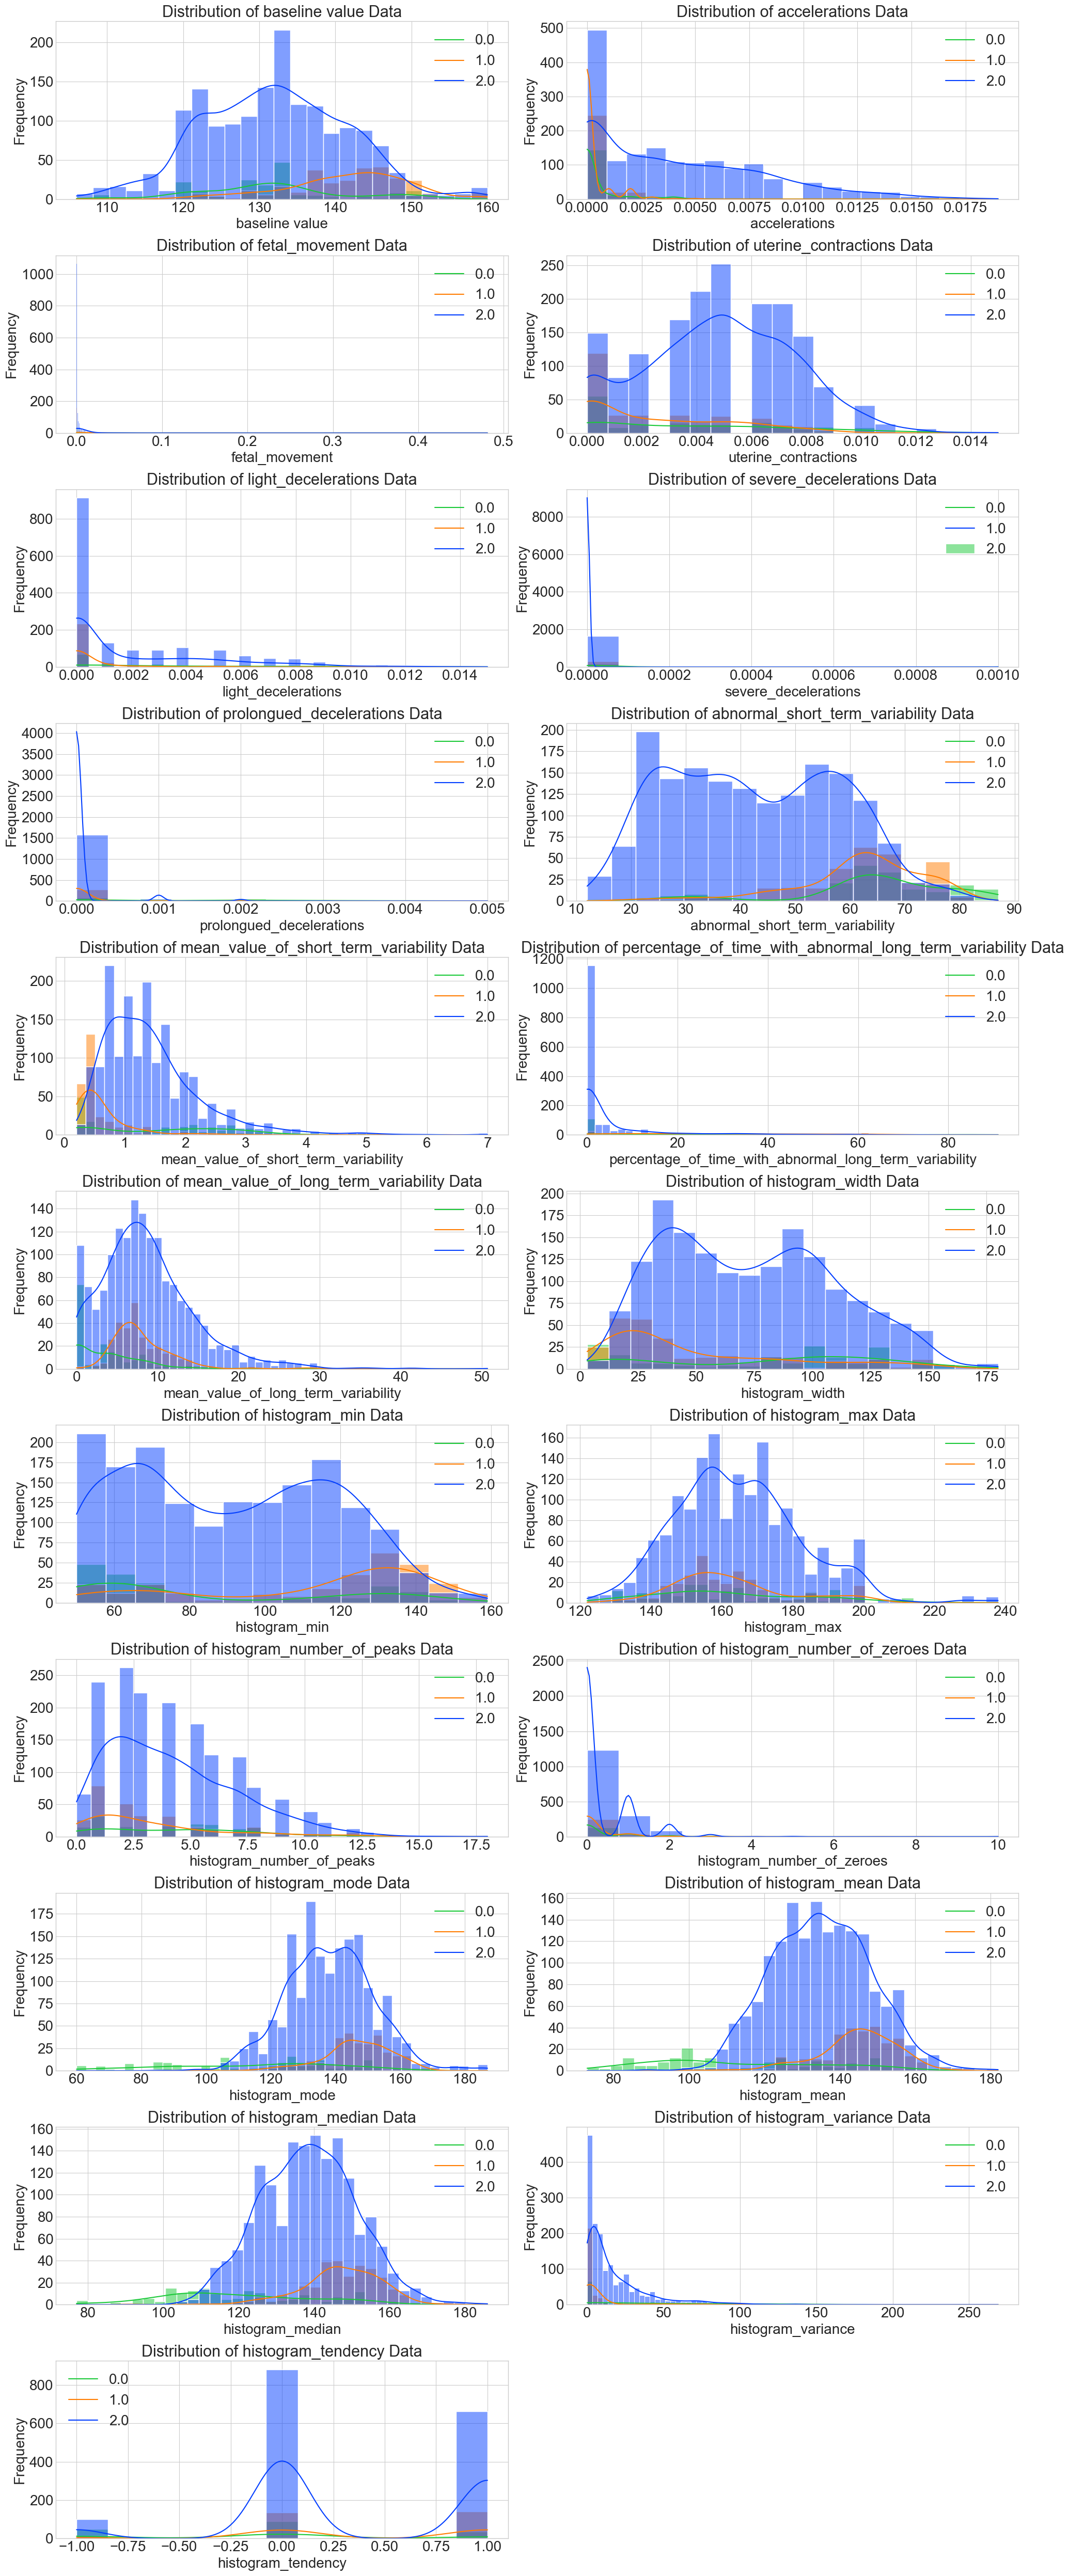

In [38]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress warnings
warnings.filterwarnings('ignore')

# Set seaborn style
plt.style.use('seaborn-v0_8-whitegrid')

# Drop the target variable from the features
X = df.drop('fetal_health', axis=1)

# Create the figure
plt.figure(figsize=(20, 50))
num_row = 1

# Loop through each column to create the subplots
for col in X.columns:
    plt.subplot(11, 2, num_row)

    # Set title with larger font size
    plt.title(f"Distribution of {col} Data", fontsize=22)

    # Plot histogram with KDE and hue
    sns.histplot(x=df[col], kde=True, hue=df['fetal_health'], palette='bright')

    # Set x and y axis labels with larger font size
    plt.xlabel(col, fontsize=20)
    plt.ylabel('Frequency', fontsize=20)

    # Set larger font size for ticks
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    # Set larger font size for the legend
    plt.legend(df['fetal_health'].value_counts().index-1,title_fontsize='20', fontsize='20')
    #plt.legend(title='fetal_health',title_fontsize='15', fontsize='15')
    # Adjust layout
    plt.tight_layout()

    num_row += 1

# Show the plots

plt.show()

<h1 style="color:#FFFFFF; text-align:left; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.1);">
  ● Visualizing Data Distributions with <code>Box-Plot</code>
</h1>

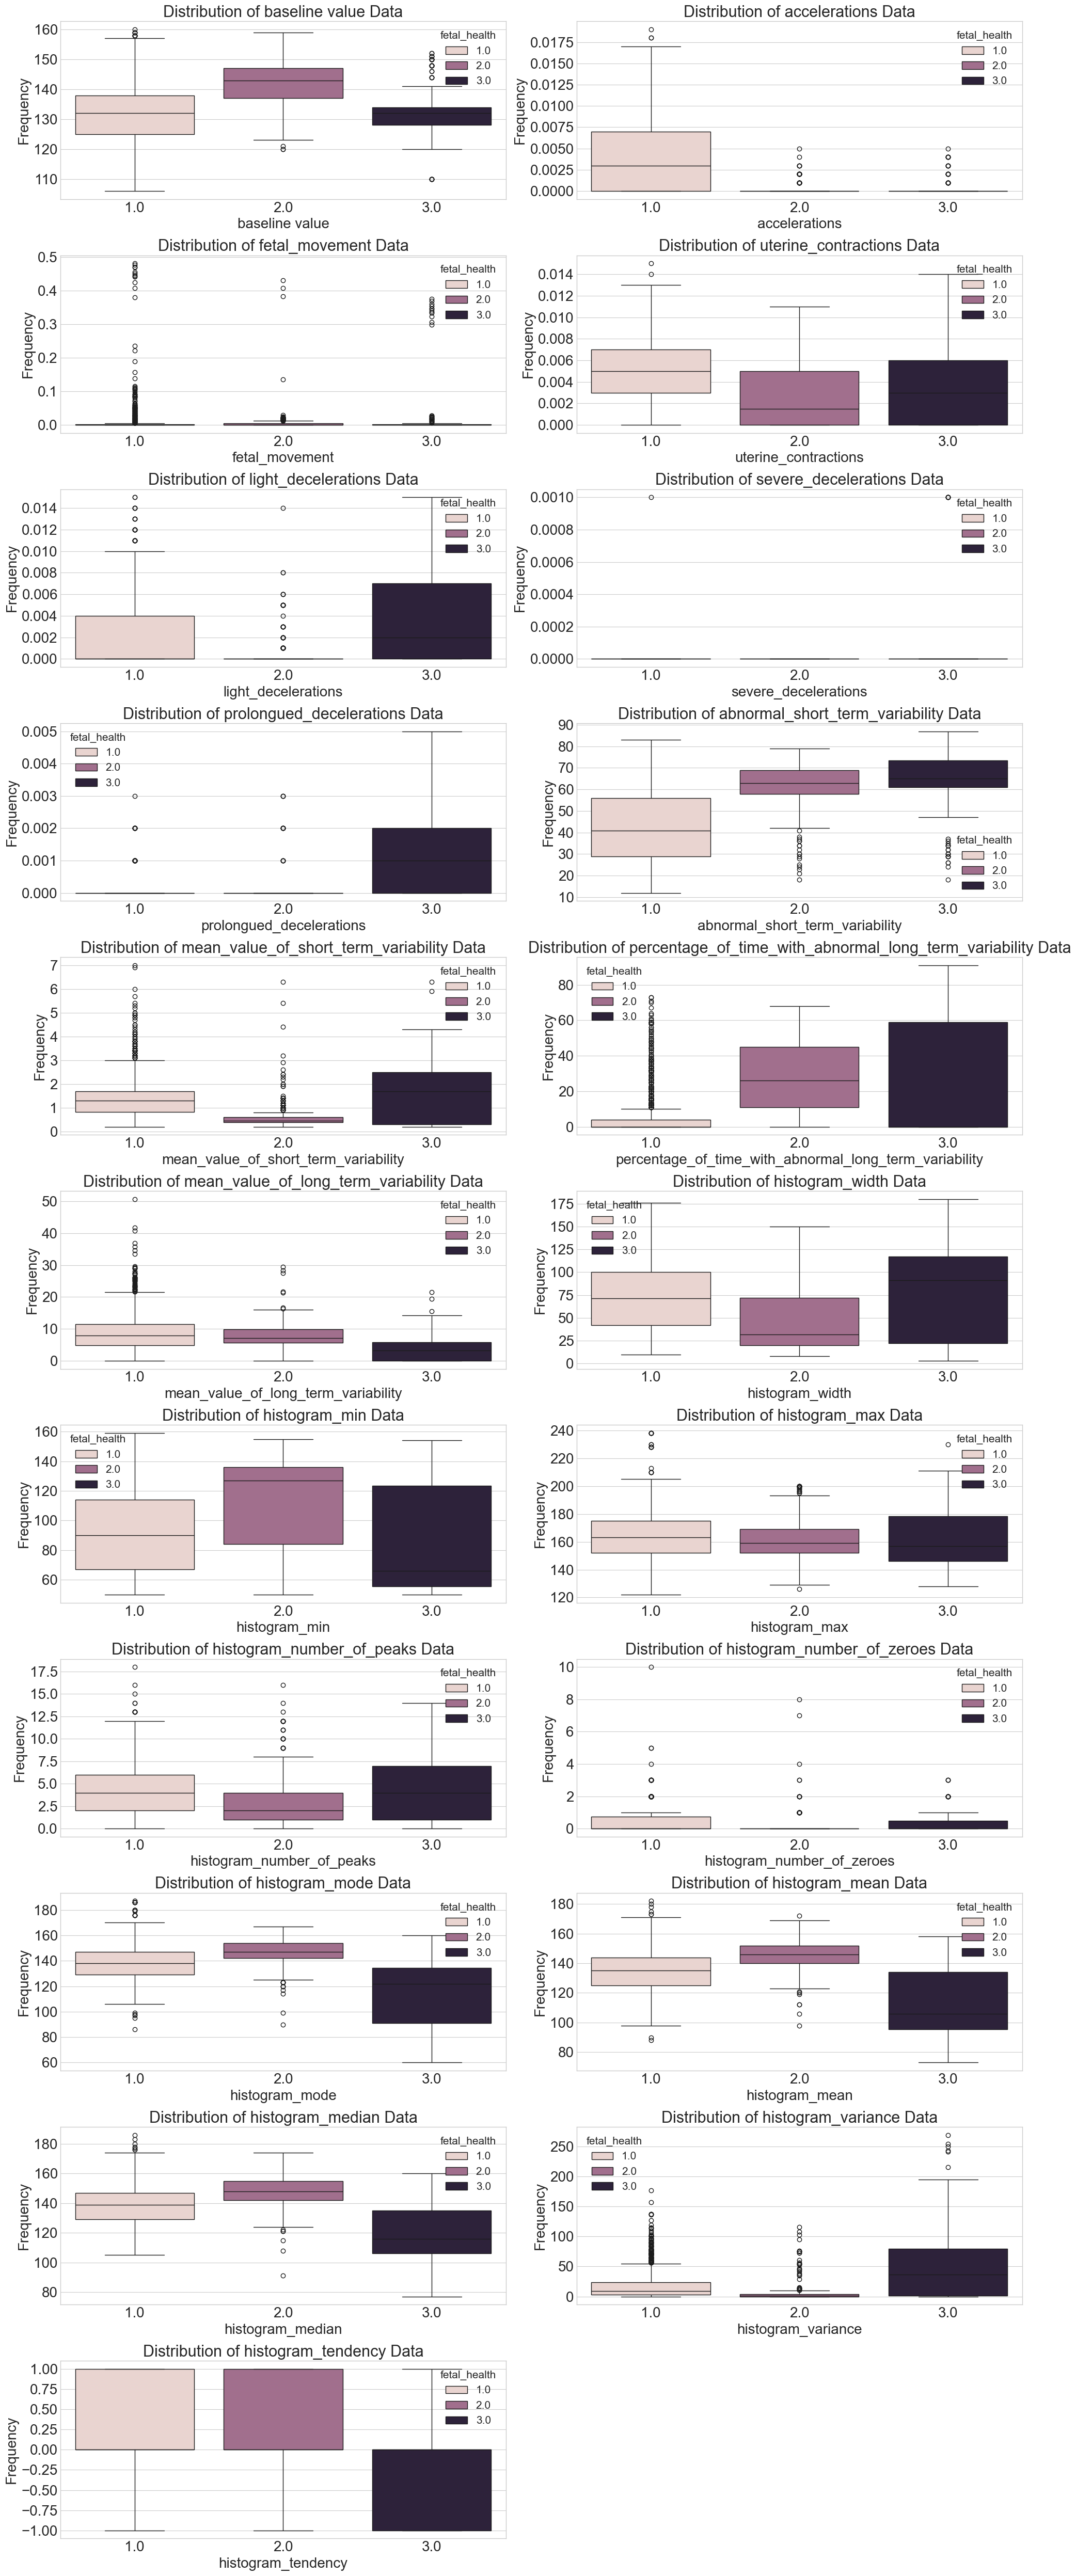

In [39]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress warnings
warnings.filterwarnings('ignore')

# Set seaborn style
plt.style.use('seaborn-v0_8-whitegrid')

# Drop the target variable from the features
X = df.drop('fetal_health', axis=1)

# Create the figure
plt.figure(figsize=(20, 50))
num_row = 1

# Loop through each column to create the subplots
for col in X.columns:
    plt.subplot(11, 2, num_row)

    # Set title with larger font size
    plt.title(f"Distribution of {col} Data", fontsize=22)

    # Plot histogram with KDE and hue
    sns.boxplot(y=df[col], x=df['fetal_health'],hue=df['fetal_health'])

    # Set x and y axis labels with larger font size
    plt.xlabel(col, fontsize=20)
    plt.ylabel('Frequency', fontsize=20)

    # Set larger font size for ticks
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    # Set larger font size for the legend
    plt.legend(title='fetal_health',title_fontsize='15', fontsize='15')

    # Adjust layout
    plt.tight_layout()

    num_row += 1

# Show the plots

plt.show()

### Correlation heatmap

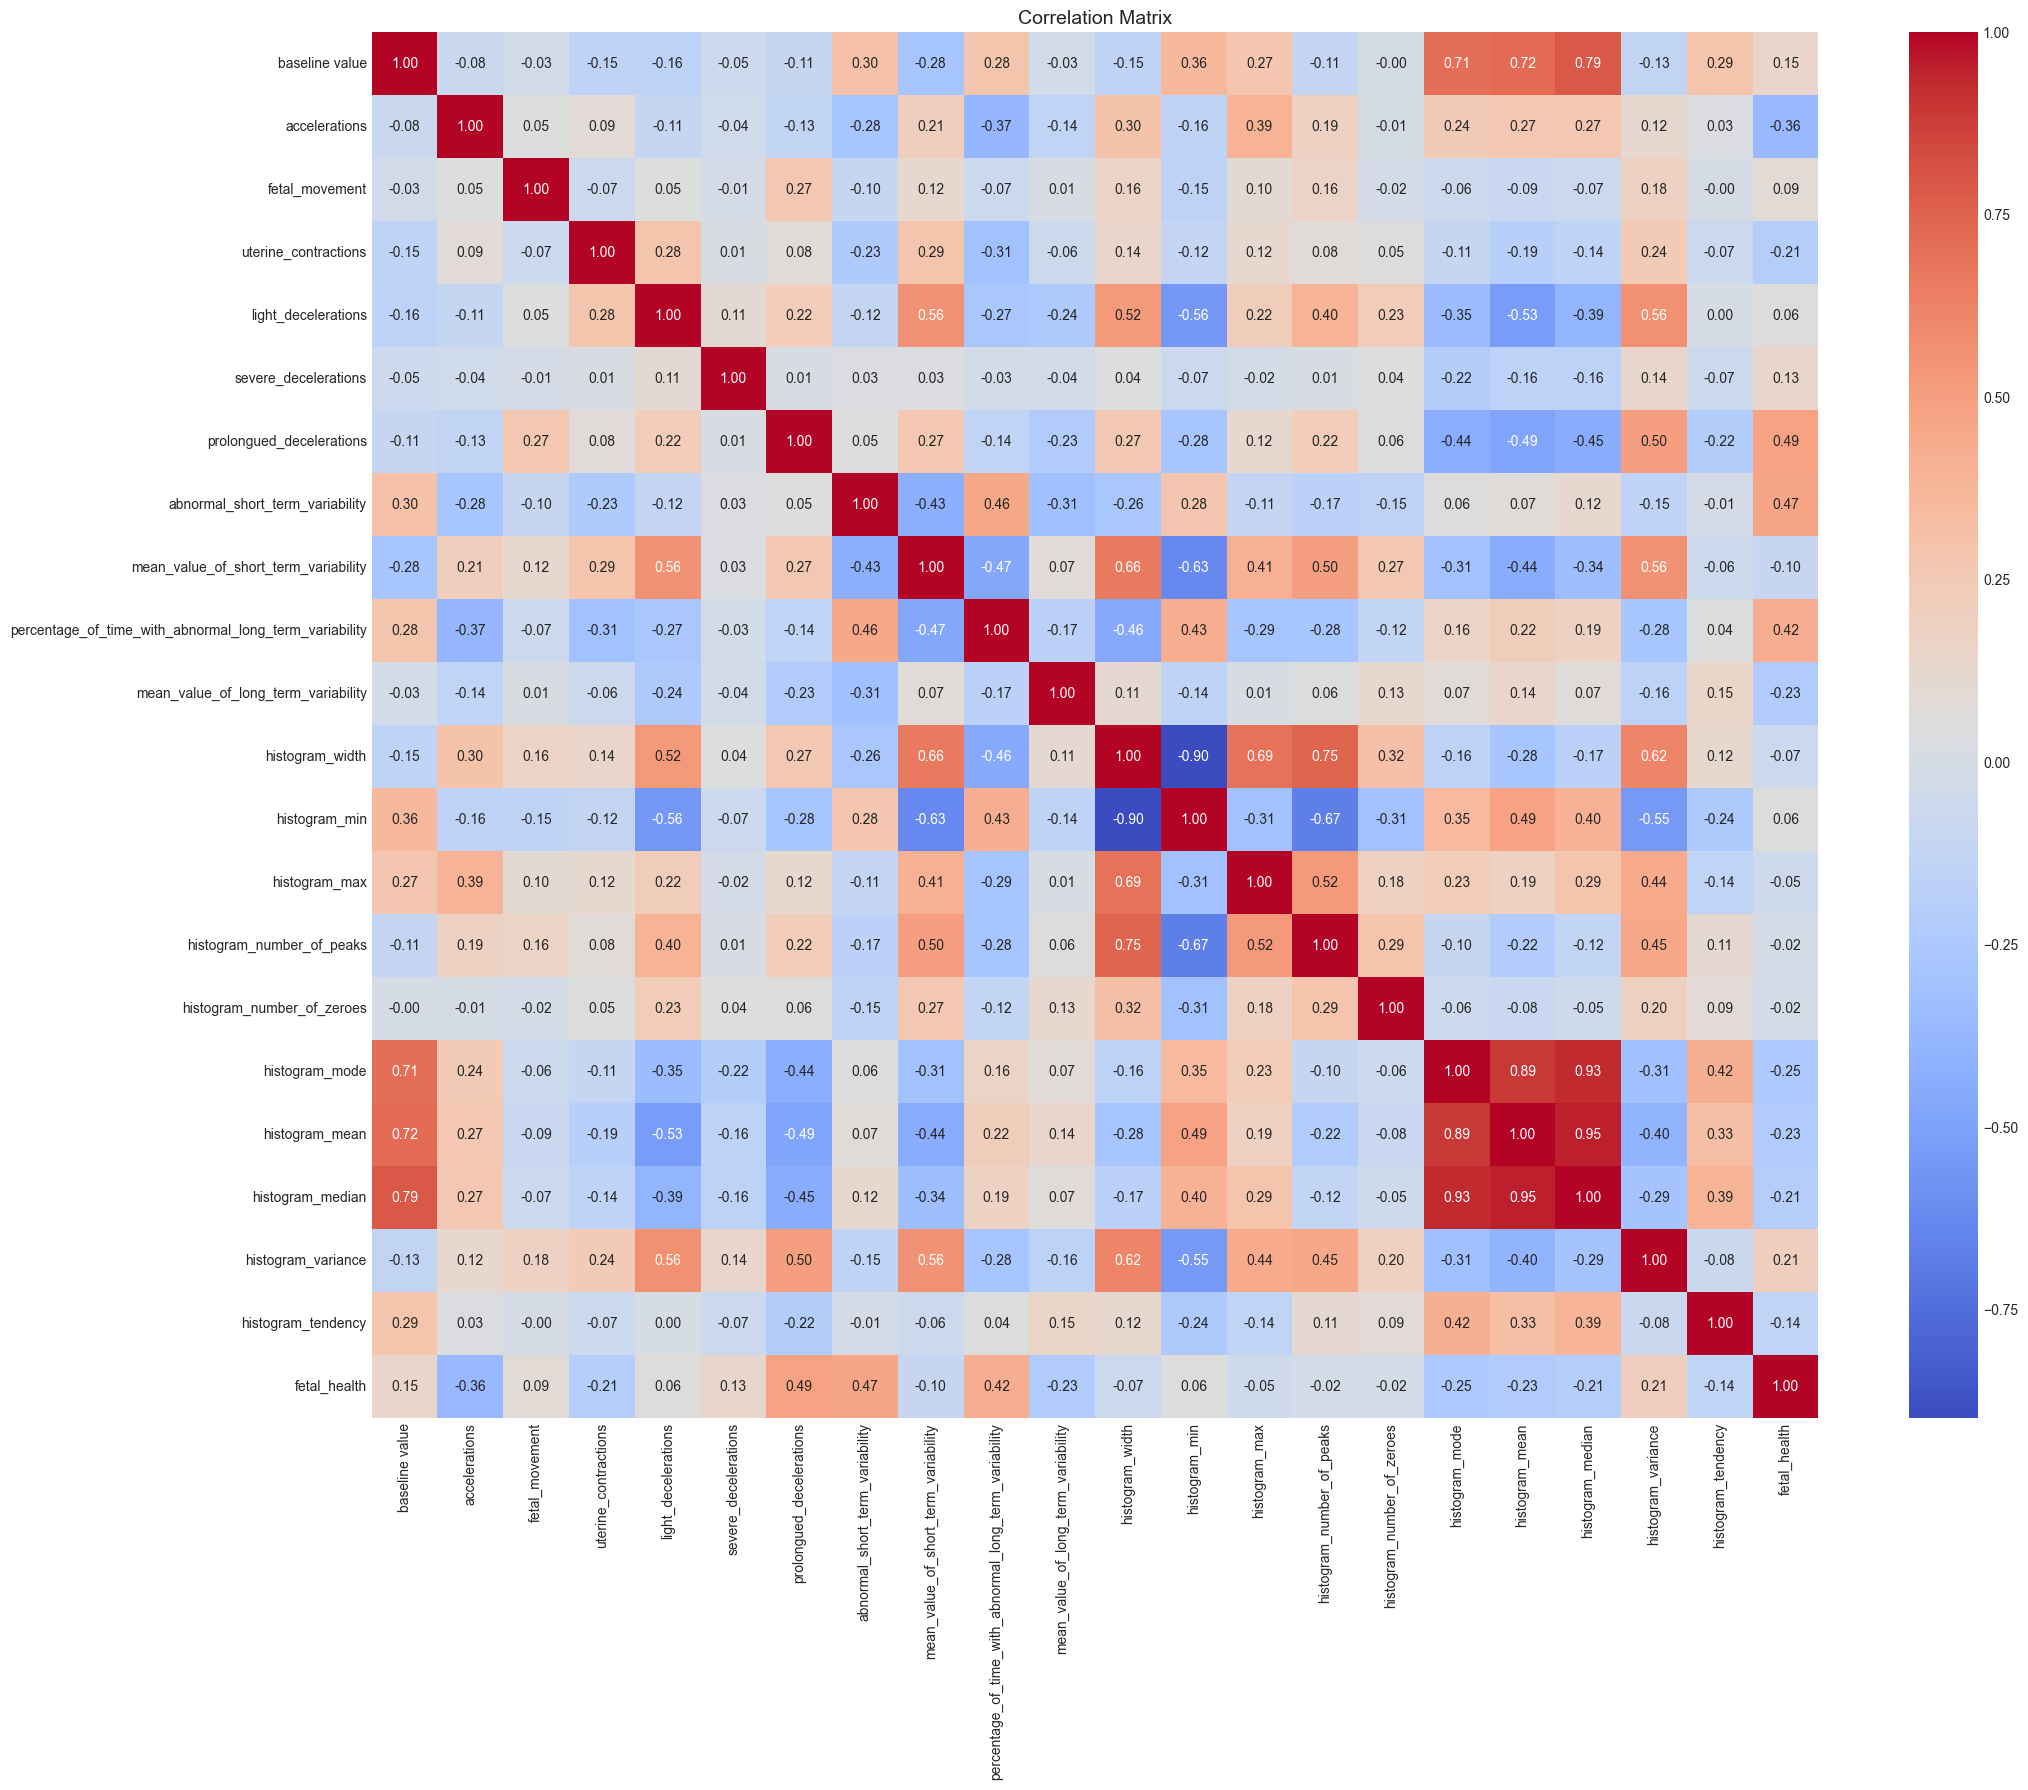

In [40]:
correlation_matrix = df.corr()

plt.figure(figsize=(22, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

plt.title('Correlation Matrix', fontsize=14)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

### Dropping the features

## 5) Feature Analysis

## ANOVA Test

Let us first understand what is ANOVA Test.

The **ANOVA (Analysis of Variance) test** It helps us figure out if the groups we are comparing are really different. In this case, ANOVA tells us what we need to know to compare test scores (or any other measurement) between groups:

In simple terms:
- **F-statistic** shows us if the groups are different.
- **p-value** tells us if those differences are meaningful or just random.


ANOVA Test Results:

Top 5 Most Significant Features:
                                                    f_statistic  \
prolongued_decelerations                             507.304309   
abnormal_short_term_variability                      337.703020   
percentage_of_time_with_abnormal_long_term_vari...   335.386156   
histogram_mean                                       298.759569   
accelerations                                        194.618345   

                                                          p_value  significant  
prolongued_decelerations                            1.284117e-180         True  
abnormal_short_term_variability                     5.762476e-128         True  
percentage_of_time_with_abnormal_long_term_vari...  3.337805e-127         True  
histogram_mean                                      5.688802e-115         True  
accelerations                                        2.698959e-78         True  

Least Significant Features:
                           

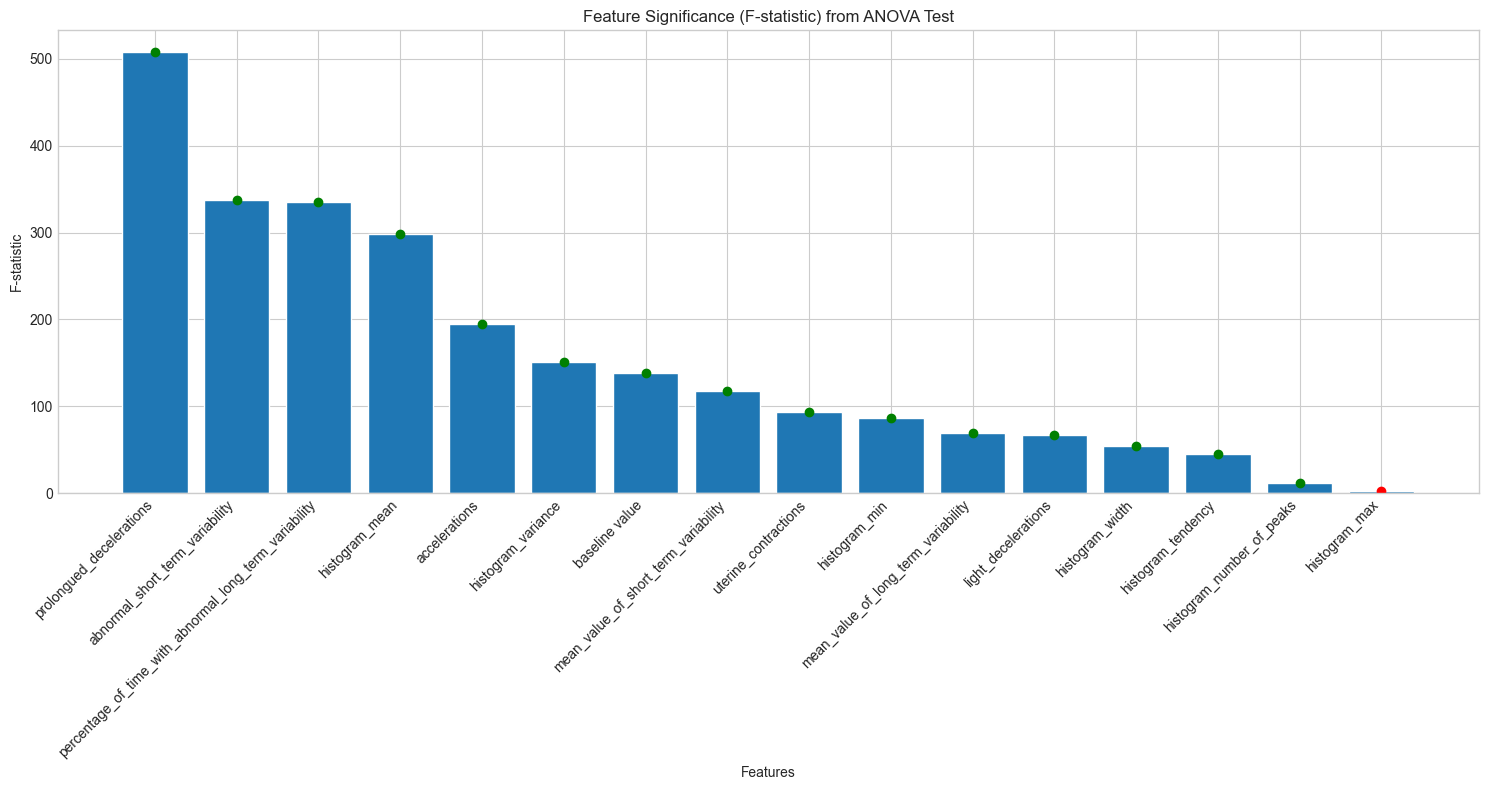


Percentage of statistically significant features: 93.75%


In [42]:
def perform_anova_analysis(df):
    anova_results = {}

    for feature in df.columns[:-1]:
        classes = [
            group[feature].values
            for name, group in df.groupby('fetal_health')
        ]

        f_statistic, p_value = stats.f_oneway(*classes)

        anova_results[feature] = {
            'f_statistic': f_statistic,
            'p_value': p_value
        }

    results_df = pd.DataFrame(anova_results).T
    results_df['significant'] = results_df['p_value'] < 0.05

    results_df = results_df.sort_values('f_statistic', ascending=False)

    return results_df

def plot_anova_results(results_df):

    plt.figure(figsize=(15, 8))
    plt.bar(range(len(results_df)), results_df['f_statistic'])
    plt.xticks(range(len(results_df)), results_df.index, rotation=45, ha='right')
    plt.title('Feature Significance (F-statistic) from ANOVA Test')
    plt.xlabel('Features')
    plt.ylabel('F-statistic')

    for i, significant in enumerate(results_df['significant']):
        color = 'green' if significant else 'red'
        plt.plot(i, results_df['f_statistic'].iloc[i], 'o', color=color)

    plt.tight_layout()

    return plt

results = perform_anova_analysis(df)

print("\nANOVA Test Results:")
print("\nTop 5 Most Significant Features:")
print(results.head())
print("\nLeast Significant Features:")
print(results.tail())

plot_anova_results(results)
plt.show()

significant_features = results['significant'].sum()
total_features = len(results)
print(f"\nPercentage of statistically significant features: {(significant_features/total_features)*100:.2f}%")

In [43]:
df.drop(columns=['histogram_max'], axis = 1, inplace = True)

In [44]:
df

,baseline value,accelerations,uterine_contractions,light_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_number_of_peaks,histogram_mean,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.0,73.0,0.5,43.0,2.4,64.0,62.0,2.0,137.0,73.0,1.0,2.0
1,132.0,0.006,0.006,0.003,0.0,17.0,2.1,0.0,10.4,130.0,68.0,6.0,136.0,12.0,0.0,1.0
2,133.0,0.003,0.008,0.003,0.0,16.0,2.1,0.0,13.4,130.0,68.0,5.0,135.0,13.0,0.0,1.0
3,134.0,0.003,0.008,0.003,0.0,16.0,2.4,0.0,23.0,117.0,53.0,11.0,134.0,13.0,1.0,1.0
4,132.0,0.007,0.008,0.000,0.0,16.0,2.4,0.0,19.9,117.0,53.0,9.0,136.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.007,0.000,0.0,79.0,0.2,25.0,7.2,40.0,137.0,4.0,150.0,2.0,0.0,2.0
2122,140.0,0.001,0.007,0.000,0.0,78.0,0.4,22.0,7.1,66.0,103.0,6.0,148.0,3.0,1.0,2.0
2123,140.0,0.001,0.007,0.000,0.0,79.0,0.4,20.0,6.1,67.0,103.0,5.0,148.0,4.0,1.0,2.0
2124,140.0,0.001,0.006,0.000,0.0,78.0,0.4,27.0,7.0,66.0,103.0,6.0,147.0,4.0,1.0,2.0


In [41]:
df.drop(['histogram_median', 'histogram_mode', 'severe_decelerations', 'histogram_number_of_zeroes', 'fetal_movement'], axis = 1, inplace = True)

## ⚖️ Oversampling the target variable classes

In [45]:
from imblearn.over_sampling import SMOTE

X = df.iloc[:, :-1]
Y = df['fetal_health']

smote = SMOTE(sampling_strategy='auto')  # Auto means all classes will be Resample to the same number
X_resampled, y_resampled = smote.fit_resample(X, Y)

In [46]:
X_resampled.shape, y_resampled.value_counts()

((4938, 15),
 fetal_health
 2.0    1646
 1.0    1646
 3.0    1646
 Name: count, dtype: int64)

## Train Test Split

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [48]:
X_train.shape, X_test.shape

((3456, 15), (1482, 15))

## Feature Scaling on the Training Set

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)
# Adjust the target values so they start from 0
y_train = y_train - 1
y_test = y_test - 1

## For Plotting ROC-AUC Data

In [55]:
def plot_multi_class_roc(model, X_test, y_test, num_classes=3):
    # Binarize the labels for multi-class ROC calculation
    y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
    y_pred_proba = model.predict_proba(X_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Compute ROC curve and ROC area for each class
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.figure(figsize=(8, 6))
    colors = cycle(['blue', 'red', 'green'])

    for i, color in zip(range(num_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i+1} (AUC = {roc_auc[i]:.4f})')

    # Plot the diagonal (random classifier)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-Class ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

### For Plotting Confusion Matrix

In [57]:
def plot_confusion_matrix_heatmap(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
    plt.title(f'Confusion Matrix Heatmap - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

<h1 style="color:#FFFFFF; text-align:left; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.1);">
  1) Support Vector Machine (SVM)
</h1>

In [66]:
# Support Vector Machine (SVM)
svm_model = SVC(random_state=42, probability=True)
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)

# Support Vector Machine (SVM) - Classification Report & Confusion Matrix
print(svm_accuracy)
print("SVM Classification Report")
print(classification_report(y_test, svm_y_pred))
print("SVM Confusion Matrix")
print(confusion_matrix(y_test, svm_y_pred))

# Calculate MCC for the model's predictions
mcc_svm = matthews_corrcoef(y_test,svm_y_pred)

# Print MCC
print(f"Matthews Correlation Coefficient (MCC): {mcc_svm:.4f}")

0.8333333333333334
SVM Classification Report
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       503
           1       0.74      0.81      0.77       485
           2       0.94      0.84      0.89       494

    accuracy                           0.83      1482
   macro avg       0.84      0.83      0.83      1482
weighted avg       0.84      0.83      0.84      1482

SVM Confusion Matrix
[[423  76   4]
 [ 67 395  23]
 [ 12  65 417]]
Matthews Correlation Coefficient (MCC): 0.7514


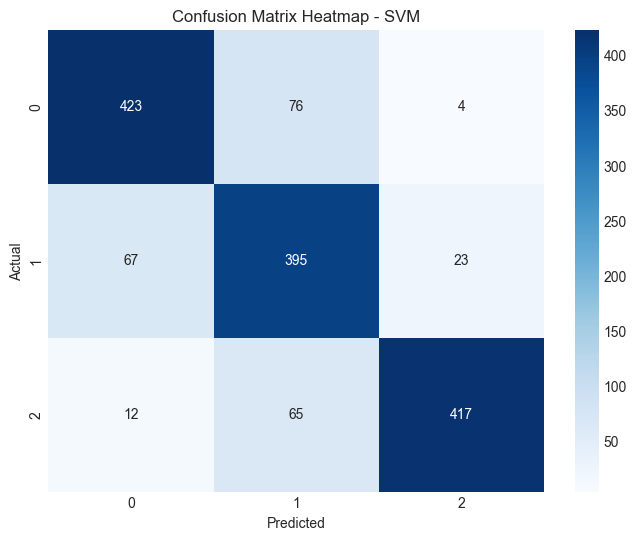

In [67]:
plot_confusion_matrix_heatmap(y_test, svm_y_pred, 'SVM')

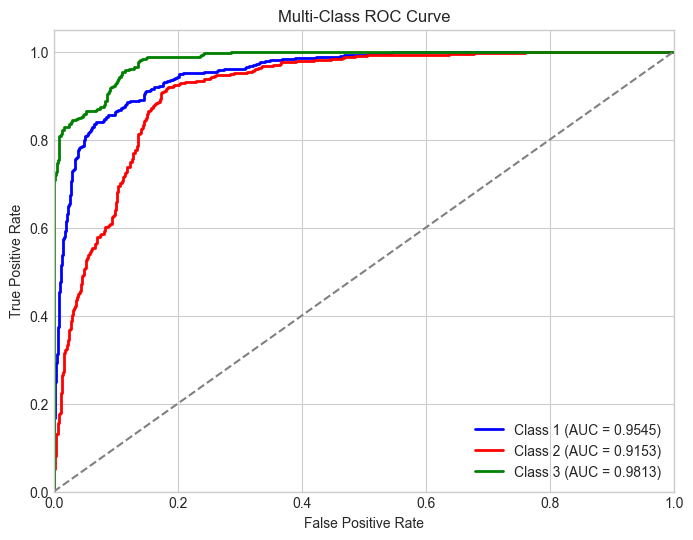

In [60]:
plot_multi_class_roc(svm_model ,X_test, y_test, num_classes=3)

<h1 style="color:#FFFFFF; text-align:left; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.1);">
  2) K-Nearest Neighbors (KNN)
</h1>

In [61]:
# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)

# K-Nearest Neighbors (KNN) - Classification Report & Confusion Matrix
print("KNN Classification Report")
print(classification_report(y_test, knn_y_pred))
print("KNN Confusion Matrix")
print(confusion_matrix(y_test, knn_y_pred))

# Calculate MCC for the model's predictions
mcc_knn = matthews_corrcoef(y_test,knn_y_pred)

# Print MCC
print(f"Matthews Correlation Coefficient (MCC): {mcc_knn:.4f}")

KNN Classification Report
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       503
           1       0.88      0.95      0.91       485
           2       0.97      0.98      0.98       494

    accuracy                           0.93      1482
   macro avg       0.93      0.93      0.93      1482
weighted avg       0.93      0.93      0.93      1482

KNN Confusion Matrix
[[437  59   7]
 [ 18 459   8]
 [  2   6 486]]
Matthews Correlation Coefficient (MCC): 0.9000


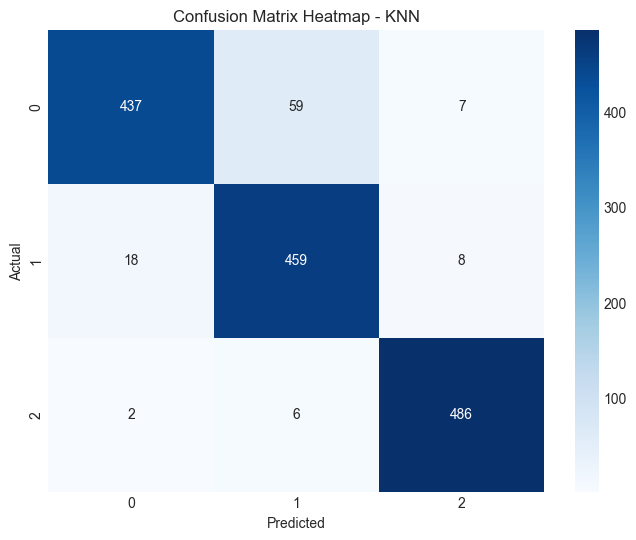

In [62]:
plot_confusion_matrix_heatmap(y_test, knn_y_pred, 'KNN')

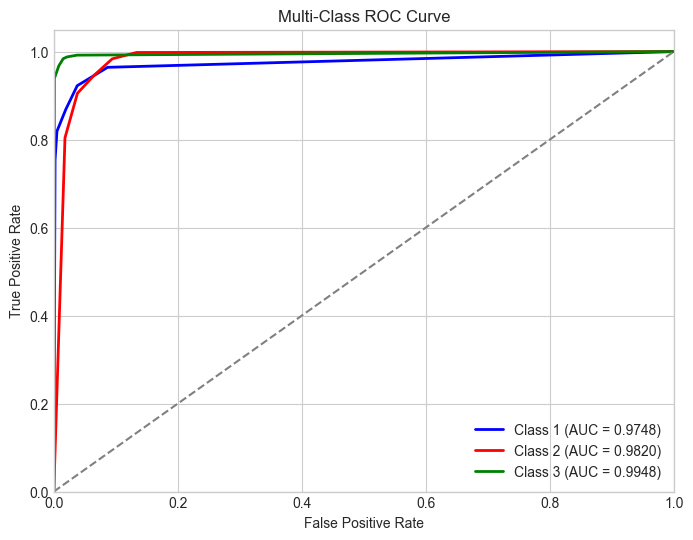

In [63]:
plot_multi_class_roc(knn_model ,X_test, y_test, num_classes=3)

<h1 style="color:#FFFFFF; text-align:left; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.1);">
  3) XGBoost Classifier
</h1>

In [64]:
# XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)

# XGBoost - Classification Report & Confusion Matrix

print("XGBoost Classification Report")
print(classification_report(y_test, xgb_y_pred))
print("XGBoost Confusion Matrix")
print(confusion_matrix(y_test, xgb_y_pred))

# Calculate MCC for the model's predictions
mcc_XGb = matthews_corrcoef(y_test,xgb_y_pred)

# Print MCC
print(f"Matthews Correlation Coefficient (MCC): {mcc_XGb:.4f}")

XGBoost Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       503
           1       0.96      0.98      0.97       485
           2       1.00      0.98      0.99       494

    accuracy                           0.98      1482
   macro avg       0.98      0.98      0.98      1482
weighted avg       0.98      0.98      0.98      1482

XGBoost Confusion Matrix
[[491  11   1]
 [  9 475   1]
 [  1   7 486]]
Matthews Correlation Coefficient (MCC): 0.9697


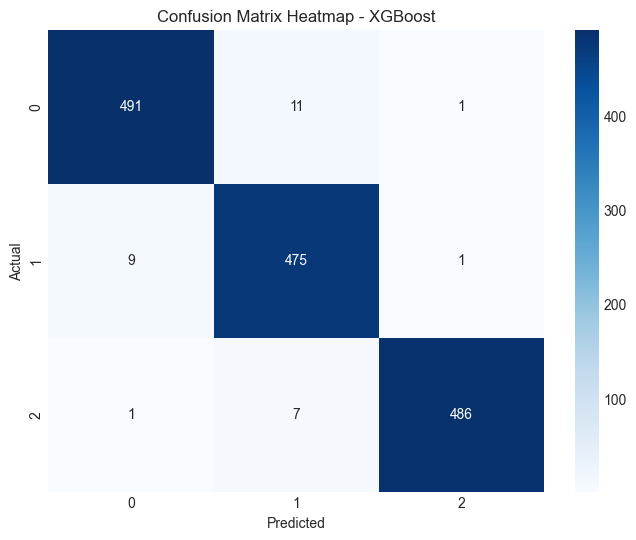

In [65]:
plot_confusion_matrix_heatmap(y_test, xgb_y_pred, 'XGBoost')

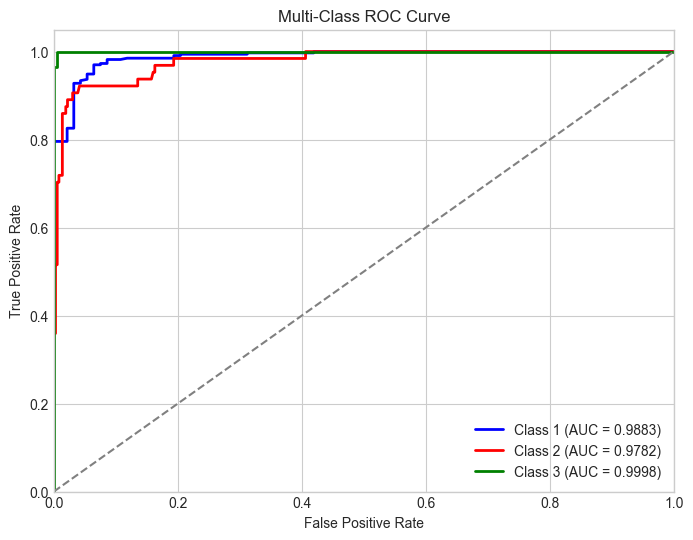

In [30]:
plot_multi_class_roc(xgb_model ,X_test, y_test, num_classes=3)

<h1 style="color:#FFFFFF; text-align:left; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.1);">
  4) Decision Tree Classifier
</h1>

In [68]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, matthews_corrcoef
from sklearn.model_selection import GridSearchCV

# Define the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dt_model, param_grid=parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters for Decision Tree:", best_params)

# Train the model with best parameters
dt_model = DecisionTreeClassifier(**best_params, random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
dt_y_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)

# Decision Tree - Classification Report & Confusion Matrix
print("Decision Tree Classification Report")
print(classification_report(y_test, dt_y_pred))
print("Decision Tree Confusion Matrix")
print(confusion_matrix(y_test, dt_y_pred))

# Calculate MCC for the model's predictions
mcc_dt = matthews_corrcoef(y_test, dt_y_pred)

# Print MCC
print(f"Matthews Correlation Coefficient (MCC): {mcc_dt:.4f}")

Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       503
           1       0.93      0.95      0.94       485
           2       0.99      0.97      0.98       494

    accuracy                           0.95      1482
   macro avg       0.95      0.95      0.95      1482
weighted avg       0.95      0.95      0.95      1482

Decision Tree Confusion Matrix
[[473  27   3]
 [ 22 459   4]
 [  6   7 481]]
Matthews Correlation Coefficient (MCC): 0.9302


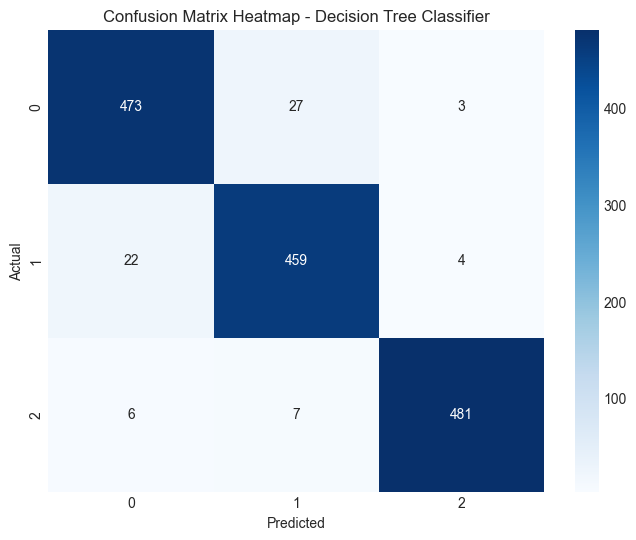

In [69]:
plot_confusion_matrix_heatmap(y_test, dt_y_pred, 'Decision Tree Classifier')

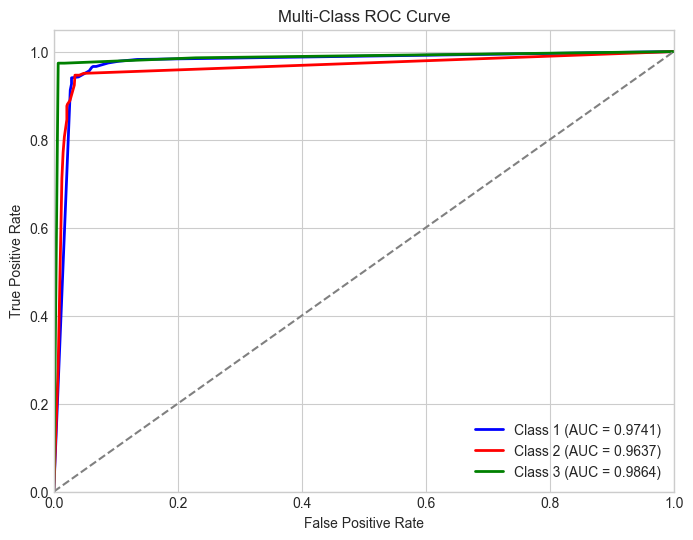

In [70]:
plot_multi_class_roc(dt_model ,X_test, y_test, num_classes=3)

<h1 style="color:#FFFFFF; text-align:left; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.1);">
  5) Random Forest
</h1>

In [71]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, matthews_corrcoef
from sklearn.model_selection import GridSearchCV

# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
parameters = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters for Random Forest:", best_params)

# Train the model with best parameters
rf_model = RandomForestClassifier(**best_params, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)

# Random Forest - Classification Report & Confusion Matrix
print("Random Forest Classification Report")
print(classification_report(y_test, rf_y_pred))
print("Random Forest Confusion Matrix")
print(confusion_matrix(y_test, rf_y_pred))

# Calculate MCC for the model's predictions
mcc_rf = matthews_corrcoef(y_test, rf_y_pred)

# Print MCC
print(f"Matthews Correlation Coefficient (MCC): {mcc_rf:.4f}")

Best Parameters for Random Forest: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       503
           1       0.95      0.98      0.96       485
           2       1.00      0.98      0.99       494

    accuracy                           0.97      1482
   macro avg       0.97      0.97      0.97      1482
weighted avg       0.97      0.97      0.97      1482

Random Forest Confusion Matrix
[[485  16   2]
 [ 12 473   0]
 [  1   7 486]]
Matthews Correlation Coefficient (MCC): 0.9616


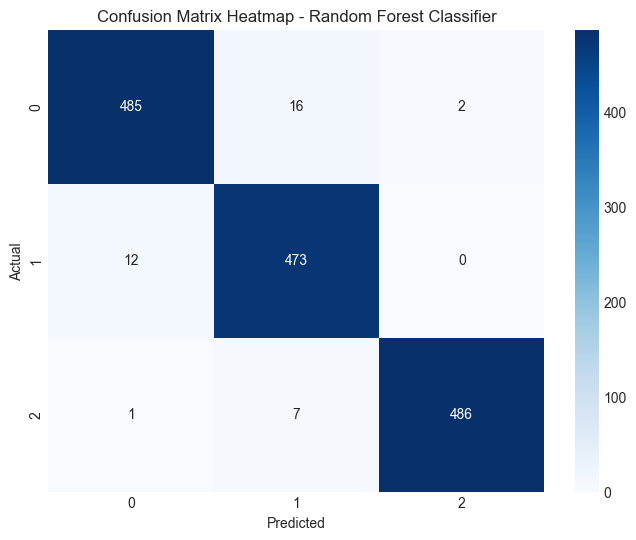

In [72]:
plot_confusion_matrix_heatmap(y_test, rf_y_pred, 'Random Forest Classifier')

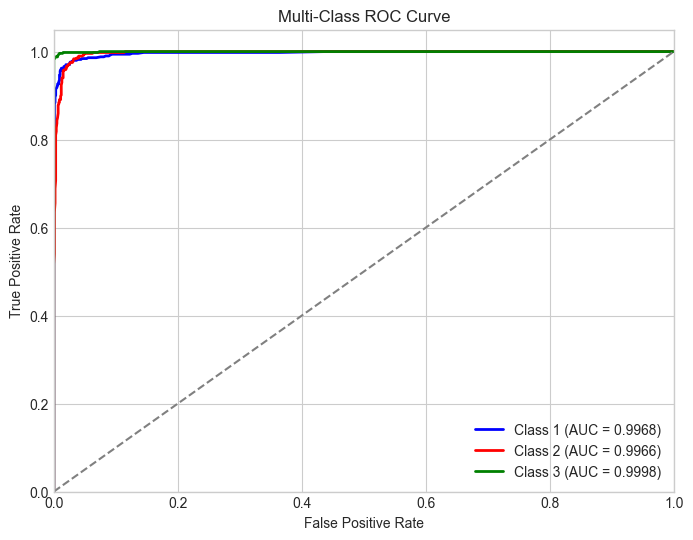

In [73]:
plot_multi_class_roc(rf_model ,X_test, y_test, num_classes=3)

### Model Accuracy Final Evaluation

In [74]:
import plotly.graph_objs as go

# Data for the bar plot
models = ['SVM', 'Random Forest', 'KNN', 'XGBoost','Decision Tree']
accuracies = [svm_accuracy, rf_accuracy, knn_accuracy, xgb_accuracy,dt_accuracy ]

# Create a bar plot
bar_fig = go.Figure()

# Add bar trace
bar_fig.add_trace(go.Bar(
    x=models,
    y=accuracies,
    marker_color='#66C2A5'
))

# Update layout with increased size
bar_fig.update_layout(
    title='Model Comparison - Accuracy',
    xaxis_title='Models',
    yaxis_title='Accuracy',
    yaxis=dict(range=[0.8, 1.0]),  # Set y-axis limits
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    width=800,  # Increase width
    height=800   # Increase height
)

# Show the figure
bar_fig.show()


<h1 style="color:#800080; text-align:left; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.1);">
  ● Model Comparison - Matthews Correlation Coefficient (MCC)
</h1>

In [75]:
# Model names and corresponding MCC values
models = ['SVM', 'Random Forest', 'KNN', 'XGBoost','Decision Tree']
mcc_values = [mcc_svm, mcc_rf, mcc_knn, mcc_XGb, mcc_dt]

# Create a bar plot
mcc_fig = go.Figure()

# Add bar trace
mcc_fig.add_trace(go.Bar(
    x=models,
    y=mcc_values,
    marker_color='#66C2A5'
))

# Update layout with increased size
mcc_fig.update_layout(
    title='Model Comparison - MCC',
    xaxis_title='Models',
    yaxis_title='Matthews Correlation Coefficient (MCC)',
    yaxis=dict(range=[0.0, 1.0]),  # Set y-axis limits
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    width=800,  # Increase width
    height=700   # Increase height
)

# Show the figure
mcc_fig.show()

